Principal component analysis (PCA)
==================================

### (a) Energy captured by the first k principal components
energy = the cumulative sum of top-k components variances / sum of all the variances

In [30]:
import numpy as np
import numpy.matlib as npm
from PIL import Image
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

Initialize (load and split) the training and testing data.  
With image size 92x112, train by test ratio as 6 by 4, find the energy with the top 25 eigenvalue/eigenvectors

In [21]:
m = 92
n = 112
K = 25
cv_ratio = 6
X_training =np.zeros((m * n, 40 * cv_ratio))
X_testing = np.zeros((m * n, 40 * (10 - cv_ratio)))
y_training = (npm.repmat(np.arange(40), cv_ratio, 1).T).reshape(40 * cv_ratio, )
y_testing = (npm.repmat(np.arange(40), (10 - cv_ratio), 1).T).reshape(40 * (10 - cv_ratio), )

In [25]:
data_root_dir = './att_faces/'
first_level_dirs = os.listdir(data_root_dir)
tr_cnt, te_cnt = 0, 0
for fd in first_level_dirs:
    if os.path.isdir(data_root_dir + fd):
        ind = np.random.permutation(range(1,11))
        img_dirs = os.listdir(data_root_dir + fd)
        for i in range(cv_ratio):
            img = np.array(Image.open(data_root_dir + fd + '/' + img_dirs[i]))
            X_training[:, tr_cnt] = img.reshape(m * n, order='A')
            tr_cnt += 1
        for i in range(cv_ratio, 10):
            img = np.array(Image.open(data_root_dir + fd + '/' + img_dirs[i]))
            X_testing[:, te_cnt] = img.reshape(m * n, order='A')
            te_cnt += 1


Get the mean of all images over the rows, and substract from all training images

In [34]:
tr_mean_substracted = X_training - np.mean(X_training, axis=1).reshape(m * n, 1)
te_mean_substracted = X_testing - np.mean(X_testing, axis=1).reshape(m * n, 1)

Compute the covarriance matrix and energy

In [35]:
cov = np.dot(tr_mc.T, tr_mean_substracted) / (m * n)
cov_T = np.dot(tr_mc, tr_mean_substracted.T) / (m * n)
varriance = sorted(np.diag(cov_T), reverse=True)
energy = np.cumsum(varriance) / np.sum(varriance)

Eigenvalue and Eigenvector of the covarriance matrix, with decreasing order

In [48]:
eigenvalue, eigenvector = np.linalg.eig(cov)
sort_indices = eigenvalue.argsort()[::-1]

Include only the first k eigenvectors and eigenvalues, for capturing 50% of the energy

In [57]:
evl = eigenvalue[sort_indices]
ev_sum = np.sum(evl)
ev_engy = 0.
ev_cnt = 0
pass_50 = False
for i in range(K):
    ev_engy += evl[i] / ev_sum
    ev_cnt += 1
    if ev_engy >= 0.50 and not pass_50:
        pass_50 = True
        print("{0} components needed to cpature 50% of the energy.".format(ev_cnt))
print("Top K=25 components captured {0}% of the energy.".format(ev_engy*100))

6 components needed to cpature 50% of the energy.
Top K=25 components captured 74.47320344117668% of the energy.


### (b) Top 25 eigenfaces

In [42]:
egvlK = np.sqrt(eigenvalue[sort_indices[:K]])
egvtK = np.dot(X_training, np.dot(eigenvector[:, sort_indices[:K]], np.diag(egvlK)))
tr_X_projection = np.dot(egvtK.T, tr_mean_substracted)
te_X_projection = np.dot(egvtK.T, te_mean_substracted)
ind_tmatch = np.argmin(distance.cdist(tr_X_projection.T, te_X_projection.T, 'euclidean'), axis=0)
accuracy = np.sum(y_testing == y_training[ind_tmatch])/len(y_testing)
print(accuracy)

0.7375


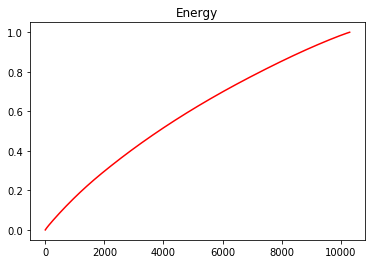

In [41]:
plt.plot(energy, 'r-')
plt.title('Energy')
plt.show()